# UCB Implementation

### Importing Libraries

In [1]:
import numpy as npli
import pandas as pd
import matplotlib.pyplot as plt

### Importing Dataset

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

### Implementing UCB

In [3]:
import math
N = 10000
d = 10
ads_selected = []
Numbers_of_Selection = [0] * d
Sum_of_Rewards = [0] * d
Total_Reward = 0
for n in range(0,N):
    ad = 0
    max_UCB = 0
    for i in range(0,d):
        if Numbers_of_Selection[i] > 0 :
            avg_Reward = Sum_of_Rewards[i] / Numbers_of_Selection[i]
            delta_i = math.sqrt( 3/2 * math.log(n + 1) / Numbers_of_Selection[i])
            UCB = avg_Reward + delta_i
        else:
            UCB = 1e400
        if UCB > max_UCB :
            max_UCB = UCB
            ad = i
    ads_selected.append(ad)
    Numbers_of_Selection[ad] += 1
    reward = dataset.values[n, ad]
    Sum_of_Rewards[ad] += reward
    Total_Reward += reward

### Visualising The Result

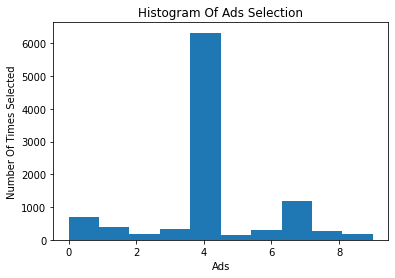

In [8]:
plt.hist(ads_selected)
plt.title("Histogram Of Ads Selection")
plt.xlabel("Ads")
plt.ylabel("Number Of Times Selected")
plt.show()